# Countour

In [16]:
import numpy as np
import cv2

img = cv2.imread(r'Desktop\opencv-master\opencv-master\samples\data\HappyFish.jpg')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print("Number of contours = " + str(len(contours)))
print(contours[0])

cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
cv2.drawContours(imgray, contours, -1, (0, 255, 0), 3)

cv2.imshow('Image', img)
cv2.imshow('Image GRAY', imgray)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of contours = 197
[[[147 191]]]


# Motion Detection

In [10]:
import cv2
import numpy as np

cap = cv2.VideoCapture(r'C:\Users\guru sai reddy\Desktop\opencv-master\opencv-master\samples\data\vtest.avi')

ret, frame1 = cap.read()
ret, frame2 = cap.read()
cap.set(3,480)
cap.set(4,360)
while cap.isOpened():
    diff = cv2.absdiff(frame1, frame2)
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
    dilated = cv2.dilate(thresh, None, iterations=3)
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cv2.imshow("dialated",dilated)
    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)

        if cv2.contourArea(contour) < 900:
            continue
        cv2.rectangle(frame1, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame1, "Status: {}".format('Movement'), (10, 20), cv2.FONT_HERSHEY_SIMPLEX,
                    1, (0, 0, 255), 3)
    cv2.imshow("feed", frame1)
    frame1 = frame2
    ret, frame2 = cap.read()
    if cv2.waitKey(40) == 27:
        break
cv2.destroyAllWindows()
cap.release()

# Geometry shape detection

In [15]:
import numpy as np
import cv2

img = cv2.imread(r'C:\Users\guru sai reddy\Desktop\shape.png')
imgGrey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thrash = cv2.threshold(imgGrey, 240, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thrash, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

cv2.imshow("img", img)
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.01* cv2.arcLength(contour, True), True)
    cv2.drawContours(img, [approx], 0, (0, 0, 0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 5
    if len(approx) == 3:
        cv2.putText(img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 4:
        x1 ,y1, w, h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
        if aspectRatio >= 0.95 and aspectRatio <= 1.05:
          cv2.putText(img, "square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
        else:
          cv2.putText(img, "rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 5:
        cv2.putText(img, "Pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 10:
        cv2.putText(img, "Star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    else:
        cv2.putText(img, "Circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))


cv2.imshow("shapes", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Histograms

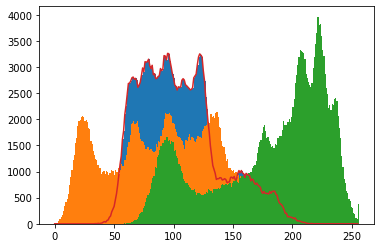

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread(r'C:\Users\guru sai reddy\Desktop\opencv-master\opencv-master\samples\data\lena.jpg')
#img = np.zeros((200,200), np.uint8)
#cv.rectangle(img, (0, 100), (200, 200), (255), -1)
#cv.rectangle(img, (0, 50), (100, 100), (127), -1)
b, g, r = cv.split(img)
cv.imshow("img", img)
cv.imshow("b", b)
cv.imshow("g", g)
cv.imshow("r", r)

plt.hist(b.ravel(), 256, [0, 256])
plt.hist(g.ravel(), 256, [0, 256])
plt.hist(r.ravel(), 256, [0, 256])

hist = cv.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()

cv.waitKey(0)
cv.destroyAllWindows()

# Template Matching

In [5]:
import cv2
import numpy as np
img = cv2.imread(r'C:\Users\guru sai reddy\Desktop\opencv-master\opencv-master\samples\data\messi5.jpg')
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template = cv2.imread(r'C:\Users\guru sai reddy\Desktop\opencv-master\opencv-master\samples\data\messi6.jpg', 0)
w, h = template.shape[::-1]
print(w,h)

res = cv2.matchTemplate(grey_img, template, cv2.TM_CCORR_NORMED )
print(res)
threshold = 0.99;
loc = np.where(res >= threshold)
print(loc)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

64 71
[[0.69681627 0.6924747  0.6883517  ... 0.7557986  0.74958235 0.7434193 ]
 [0.6920756  0.68816966 0.68460625 ... 0.7515629  0.74532706 0.73915064]
 [0.6873372  0.6838733  0.68090516 ... 0.7472019  0.74089056 0.7347685 ]
 ...
 [0.8383271  0.83821774 0.8383102  ... 0.8126966  0.8139202  0.8153178 ]
 [0.8361101  0.83601165 0.836175   ... 0.8128335  0.81376547 0.8148293 ]
 [0.8343509  0.8342365  0.8344096  ... 0.8127161  0.8136073  0.8150718 ]]
(array([61], dtype=int64), array([203], dtype=int64))


# Hough Line Transform

In [10]:
import cv2
import numpy as np

img = cv2.imread(r'C:\Users\guru sai reddy\Desktop\opencv-master\opencv-master\samples\data\sudoku.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 10, 180, apertureSize=3)
cv2.imshow('edges', edges)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
    x1 = int(x0 + 1000 * (-b))
    # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
    y1 = int(y0 + 1000 * (a))
    # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
    x2 = int(x0 - 1000 * (-b))
    # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
    y2 = int(y0 - 1000 * (a))
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)


cv2.imshow('image', img)
k = cv2.waitKey(0)
cv2.destroyAllWindows()


# Probabilistic Hough Line Transform 

In [14]:
import cv2
import numpy as np
img = cv2.imread(r'C:\Users\guru sai reddy\Desktop\opencv-master\opencv-master\samples\data\sudoku.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,10,180,apertureSize = 3)
cv2.imshow('edges', edges)
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength=100,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imshow('image', img)
k = cv2.waitKey(0)
cv2.destroyAllWindows()